<a href="https://colab.research.google.com/github/azzazhr/PCVK_Ganjil_2025/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Azzahra Attaqina**

**NIM : 2341720224**

**Kelas : TI-3B**

**MODUL 11 PCVK (TUGAS PRAKTIKUM)**

**1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama “Week11.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
cara sebagai berikut.**

In [28]:
# Impor library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [29]:
# Akses Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.**

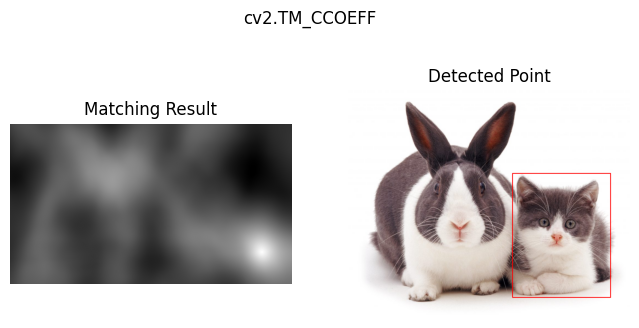

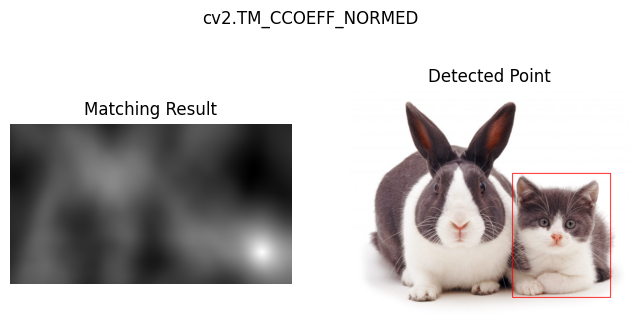

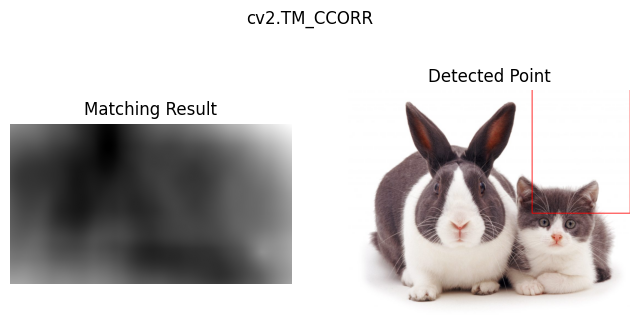

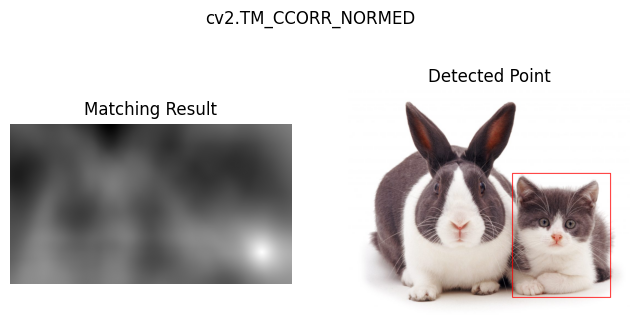

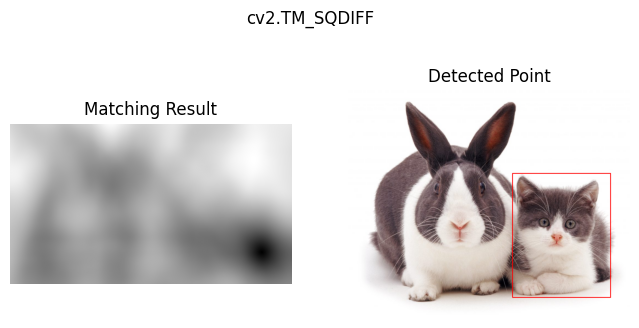

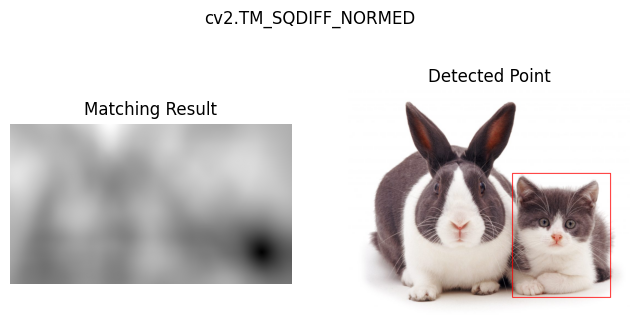

In [41]:
import cv2

# Membaca letak path file
path = '/content/drive/MyDrive/PCVK/Images/'  # ubah sesuai lokasi file kamu

# Membaca gambar source dan template
img = cv2.imread(path + 'cats_and_bunnies.jpg')
template = cv2.imread(path + 'cat2_template.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Membuat ukuran template
w, h = template_gray.shape[::-1]

# Daftar metode template matching yang akan diuji
methods = [
    'cv2.TM_CCOEFF',
    'cv2.TM_CCOEFF_NORMED',
    'cv2.TM_CCORR',
    'cv2.TM_CCORR_NORMED',
    'cv2.TM_SQDIFF',
    'cv2.TM_SQDIFF_NORMED'
]

# Melakukan matching untuk tiap metode
for meth in methods:
    img_copy = img.copy()
    method = eval(meth)

    # Lakukan template matching
    res = cv2.matchTemplate(img_gray, template_gray, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Tentukan titik pencocokan terbaik (min atau max tergantung metode)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Gambar kotak deteksi pada gambar asli
    cv2.rectangle(img_copy, top_left, bottom_right, (0, 0, 255), 2)

    # Tampilkan hasil matching
    plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    plt.imshow(res, cmap='gray')
    plt.title('Matching Result')
    plt.axis('off')

    plt.suptitle(meth)

    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.title(f'Detected Point')
    plt.axis('off')

    plt.show()

**3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut:**